# Assignment 3 -Assignment on Spark and Cloud Data Platform
## Part A
#### 1. [Marks: 15] What is an Intrusion Detection System? Is it possible to implement an Intrusion Detection System on this dataset? Explain the workflow as described in the paper for implementing Intrusion Detection System.

- As introduced in the paper, as a system which can monitor and analyze data, Intrusion detection system (IDS) can be used for any intrusion detection in the system or network. There are 3 different methods for detecting attacks: 1. Signature-based IDS which is more accurate at detecting known intrusion attempts. 2. Anomaly-based IDS, which is effective against unknown attacks or zero-day attacks, and there is no need for any updates to the system at the same time. 3. Hybrid IDS, as a combination of methods to detect intrusion, it can reduce false positive rates and result in a more accurate IDS. 

- Yes, it is possible to implement an IDS on the Input Data - kddcup.data_10_percent.gz.  

-  Workflow can be desciribed as follows:
    - Data collection: get the data which will be used to train and test the IDS. (KDD99 dataset in the paper.) 
    - Data preprocessing (Standardization): prepare the dataset for further exploration, like data cleaning, handling missing values, and converting categorical to numerical format.
    - Feature selection: use the most releveant data, for reducing the dimensionality of the dataset and improve the efficiency (PCA were used)
    - Algorithm selection: choose clustering (like k-Means), or classification algorithms (like decision trees, Support Vector Machines) for intrusion detection. 
    - Training and Testing:  training-testing split or cross-validation can be used, train the model to learn the patterns based on training data and evaluate the models using testing dataset.
    - Model evaluation: choose evaluation metrics, like AUROC or AUPR. Compare the performance of different algorithms to identify the most effective one. The training time can also be considered.
    - Optimization. Think about more techniques which may improve the detection rate or reduce the time used, like the parallel Binary Bat algorithm for efficient feature selection in the papaer.
    - Results and discussion.

#### 2. [Marks: 5] Use the python urllib library to extract the KDD Cup 99 data from their web repository, store it in a temporary location and then move it to the Databricks filesystem which can enable easy access to this data for analysis.

In [0]:
#get data
import urllib.request 
urllib.request.urlretrieve("http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz", "/tmp/kddcup_data.gz")
dbutils.fs.mv("file:/tmp/kddcup_data.gz", "dbfs:/kdd/kddcup_data.gz")
display(dbutils.fs.ls("dbfs:/kdd"))

path,name,size,modificationTime
dbfs:/kdd/kddcup_data.gz,kddcup_data.gz,2144903,1688847815000


#### 3. [Marks: 5] After storing the data in the Databricks filesystem. Load your data from the disk into Spark's RDD. Print 10 values of your RDD and verify the type of data structure of your data (RDD).

In [0]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()
path = 'dbfs:/kdd/kddcup_data.gz'
#file_path = "/FileStore/tables/kddcup_data_10_percent", upload it manually if the above step failed(sometimes)
rdd = spark.sparkContext.textFile(path)

# print top 10 values
print("The first 10 values of the RDD: ", rdd.take(10))
print("------------------------------------------")
print("The type of data structure: ", type(rdd))

The first 10 values of the RDD:  ['0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,9,9,1.00,0.00,0.11,0.00,0.00,0.00,0.00,0.00,normal.', '0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,19,19,1.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,normal.', '0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,29,29,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.', '0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,39,39,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.', '0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,49,49,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,normal.', '0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,59,59,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,normal.', '0,tcp,http,SF,212,1940,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0.0

#### 4. [Marks: 5] Split the data. (Each entry in your RDD is a comma-separated line of data, which you first need to split before you can parse and build your data frame.) Show the total number of features (columns) and print results.

In [0]:
rdd_splitted = rdd.map(lambda line: line.split(','))

# RDD ==> DataFrame
df = rdd_splitted.toDF()
print("Total number of features(columns): ", len(df.columns))
print("\nExample Before Splitting(comma-seprated line): ", rdd.take(1))
print("\nExample After splitting: ", rdd_splitted.take(1))

Total number of features(columns):  42

Example Before Splitting(comma-seprated line):  ['0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,9,9,1.00,0.00,0.11,0.00,0.00,0.00,0.00,0.00,normal.']

Example After splitting:  [['0', 'tcp', 'http', 'SF', '181', '5450', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '8', '8', '0.00', '0.00', '0.00', '0.00', '1.00', '0.00', '0.00', '9', '9', '1.00', '0.00', '0.11', '0.00', '0.00', '0.00', '0.00', '0.00', 'normal.']]


#### 5. [Marks: 5] Now extract these 6 columns (duration, protocol_type, service, src_bytes, dst_bytes, flag and label) from your dataset. Build a new RDD and data frame. Print schema and display 10 values.

In [0]:
# According to paper, the columns are loacted in the first 6 and the last one(named "class", for label)
# Set dtype to int for numerical data
rdd_new = rdd_splitted.map(lambda line: (int(line[0]),line[1],line[2],line[3],int(line[4]),int(line[5]),line[-1]))
col_new = ['duration', 'protocol_type', 'service','flag', 'src_bytes', 'dst_bytes', 'label']
df_new = rdd_new.toDF(col_new)

#Print schema and display 10 values.
df_new.printSchema()
df_new.show(10)

root
 |-- duration: long (nullable = true)
 |-- protocol_type: string (nullable = true)
 |-- service: string (nullable = true)
 |-- flag: string (nullable = true)
 |-- src_bytes: long (nullable = true)
 |-- dst_bytes: long (nullable = true)
 |-- label: string (nullable = true)

+--------+-------------+-------+----+---------+---------+-------+
|duration|protocol_type|service|flag|src_bytes|dst_bytes|  label|
+--------+-------------+-------+----+---------+---------+-------+
|       0|          tcp|   http|  SF|      181|     5450|normal.|
|       0|          tcp|   http|  SF|      239|      486|normal.|
|       0|          tcp|   http|  SF|      235|     1337|normal.|
|       0|          tcp|   http|  SF|      219|     1337|normal.|
|       0|          tcp|   http|  SF|      217|     2032|normal.|
|       0|          tcp|   http|  SF|      217|     2032|normal.|
|       0|          tcp|   http|  SF|      212|     1940|normal.|
|       0|          tcp|   http|  SF|      159|     4087|norm

#### 6. [Marks: 5] Get the total number of connections based on the protocol_type and based on the service. Show the result in ascending order. Plot the bar graph for both.

Number of Connections by Protocol Type:

   protocol_type   count
0           udp   20354
1           tcp  190065
2          icmp  283602


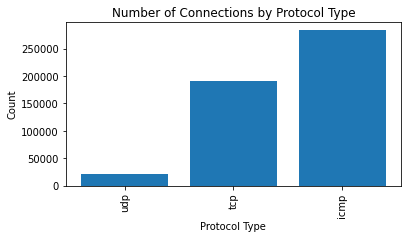

-------------------------------------------------------------------
Number of Connections by Service:

     service   count
0    tftp_u       1
1   pm_dump       1
2     red_i       1
3     tim_i       7
4       X11      11
..      ...     ...
61    other    7237
62     smtp    9723
63     http   64293
64  private  110893
65    ecr_i  281400

[66 rows x 2 columns]


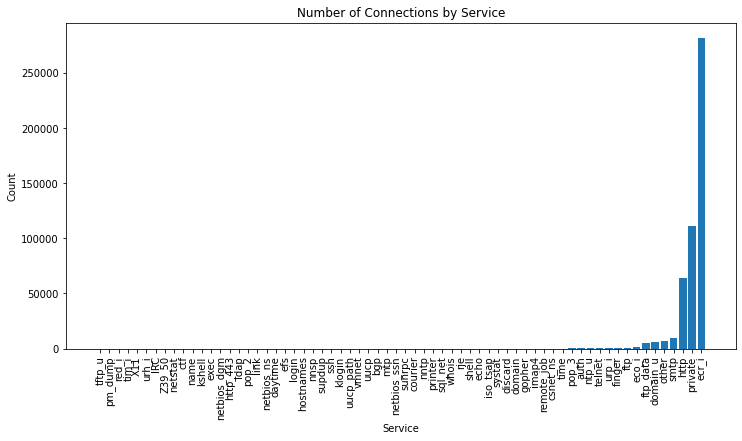

In [0]:
import matplotlib.pyplot as plt

###################### based on protocol_type ############################################
pro_type_counts = df_new.groupBy('protocol_type').count().orderBy('count', ascending=True).toPandas()
print("Number of Connections by Protocol Type:\n\n", pro_type_counts)

plt.figure(figsize=(6, 3))
plt.bar(pro_type_counts['protocol_type'], pro_type_counts['count'])
plt.title('Number of Connections by Protocol Type')
plt.xlabel('Protocol Type', fontsize=10)
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.show()


####################### based on service ############################################
service_counts = df_new.groupBy('service').count().orderBy('count', ascending=True).toPandas()
print("-------------------------------------------------------------------")
print("Number of Connections by Service:\n\n", service_counts)

plt.figure(figsize=(12, 6))
plt.bar(service_counts['service'], service_counts['count'])
plt.title('Number of Connections by Service')
plt.xlabel('Service')
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.show()


#### 7. [Marks: 15] Do a further exploratory data analysis, including other columns of this dataset and plot graphs. Plot at least 3 different charts/plots and explain them.

Number of Connections by label:

                label   count
0               spy.       2
1              perl.       3
2               phf.       4
3          multihop.       7
4         ftp_write.       8
5        loadmodule.       9
6           rootkit.      10
7              imap.      12
8       warezmaster.      20
9              land.      21
10  buffer_overflow.      30
11     guess_passwd.      53
12             nmap.     231
13              pod.     264
14         teardrop.     979
15      warezclient.    1020
16        portsweep.    1040
17          ipsweep.    1247
18            satan.    1589
19             back.    2203
20           normal.   97278
21          neptune.  107201
22            smurf.  280790


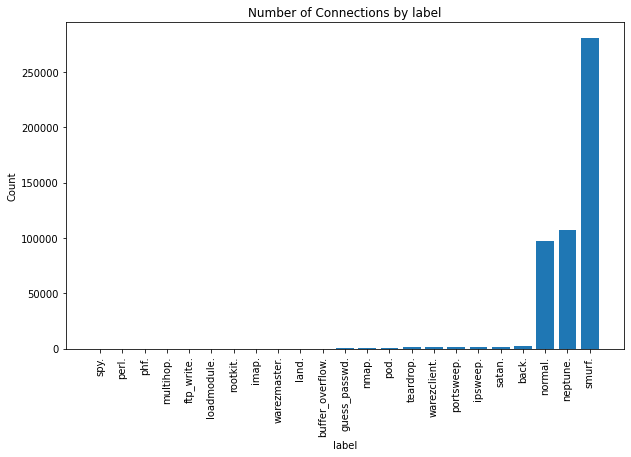

In [0]:
###################### based on label ############################################
label_counts = df_new.groupBy('label').count().orderBy('count', ascending=True).toPandas()
print("Number of Connections by label:\n\n", label_counts)

plt.figure(figsize=(10, 6))
plt.bar(label_counts['label'], label_counts['count'])
plt.title('Number of Connections by label')
plt.xlabel('label', fontsize=10)
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.show()

- Observation: There are 23 different labels. According to the bar plot, the top 3 labels are 'smurf.', 'neptune'., and then 'normal'. The 'smurf' took the majority and the counts, 280790, was even around half of the total. Other lables, except the top 3, just took a tiny amount of the total entries.

Number of Connections by flag:

       flag   count
0      OTH       8
1       S3      10
2   RSTOS0      11
3       S2      24
4       S1      57
5       SH     107
6     RSTO     579
7     RSTR     903
8      REJ   26875
9       S0   87007
10      SF  378440


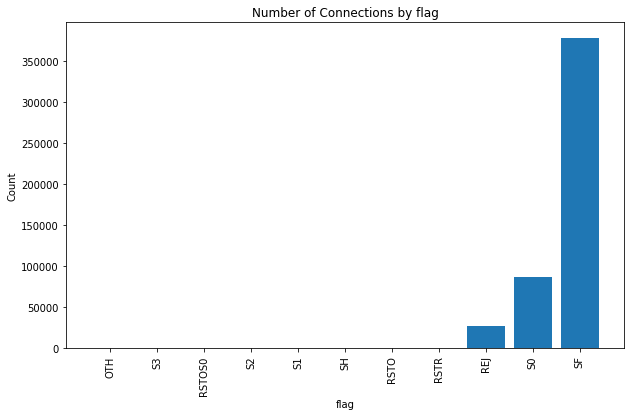

In [0]:
###################### based on flag ############################################
flag_counts = df_new.groupBy('flag').count().orderBy('count', ascending=True).toPandas()
print("Number of Connections by flag:\n\n", flag_counts)

plt.figure(figsize=(10, 6))
plt.bar(flag_counts['flag'], flag_counts['count'])
plt.title('Number of Connections by flag')
plt.xlabel('flag', fontsize=10)
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.show()

According to the table, there are 11 different flag, and most of them was 'SF', then a smaller part would be 'S0' or 'REJ'. Other 8 kinds of them only took a tiny amount.

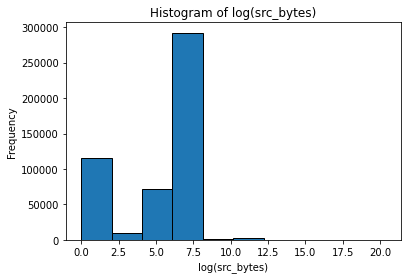

In [0]:
import numpy as np
import pandas as pd

pandas_df = df_new.select("src_bytes").toPandas()
# Calculate the logarithm of the values
pandas_df["log_src_bytes"] = np.log1p(pandas_df["src_bytes"])
plt.hist(pandas_df["log_src_bytes"], bins=10, edgecolor='black')
plt.title("Histogram of log(src_bytes)")
plt.xlabel("log(src_bytes)")
plt.ylabel("Frequency")
plt.show()


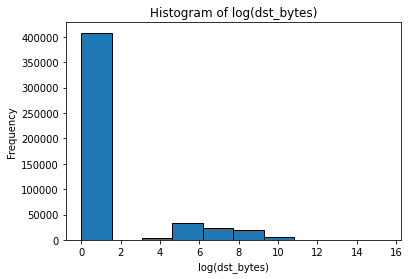

In [0]:
pandas_df = df_new.select("dst_bytes").toPandas()

# Calculate the logarithm of the values
pandas_df["log_dst_bytes"] = np.log1p(pandas_df["dst_bytes"])
plt.hist(pandas_df["log_dst_bytes"], bins=10, edgecolor='black')
plt.xlabel("log(dst_bytes)")
plt.ylabel("Frequency")
plt.title("Histogram of log(dst_bytes)")
plt.show()


- The range of these two numerical columns are huge, made the origial histograms to be skewed much, so we took the log values instead.

- By plotting the histogram with a logarithmic scale, the distribution of values in the "src_bytes" and "dst_bytes" column were  visualized better as shown above.

#### 8. [Marks: 20] Look at the label column where label == ‘normal’. Now create a new label column where you have a label == ‘normal’ and everything else is considered as an ‘attack’. Split your data (train/test) and based on your new label column now build a simple machine learning model for intrusion detection (you can use a few selected columns for your model out of all). Apply 2 different algorithms.

- A new label column where you have a label == ‘normal’ and everything else is considered as an ‘attack’

In [0]:
from pyspark.sql.functions import when

print("df with new output column 'class', instead of 'label':")
df_class = df_new.withColumn('class', when(df_new['label'] == 'normal.', 'normal').otherwise('attack')).drop('label')
df_class.show(5)

print("\nvalue counts of 'class':")
class_counts = df_class.groupBy('class').count()
class_counts.show()

df with new output column 'class', instead of 'label':
+--------+-------------+-------+----+---------+---------+------+
|duration|protocol_type|service|flag|src_bytes|dst_bytes| class|
+--------+-------------+-------+----+---------+---------+------+
|       0|          tcp|   http|  SF|      181|     5450|normal|
|       0|          tcp|   http|  SF|      239|      486|normal|
|       0|          tcp|   http|  SF|      235|     1337|normal|
|       0|          tcp|   http|  SF|      219|     1337|normal|
|       0|          tcp|   http|  SF|      217|     2032|normal|
+--------+-------------+-------+----+---------+---------+------+
only showing top 5 rows


value counts of 'class':
+------+------+
| class| count|
+------+------+
|normal| 97278|
|attack|396743|
+------+------+



- preprocessing data: index the input and output columns

In [0]:
from pyspark.ml.feature import VectorAssembler, StringIndexer

# choose the 6 input features as above: ['duration', 'protocol_type', 'service', 'src_bytes', 'dst_bytes', 'flag']
# use the df_class data, here we have column named 'class' as the output feature

# index ouput column
class_indexer = StringIndexer(inputCol="class", outputCol="indexed_class")
df_indexed = class_indexer.fit(df_class).transform(df_class)

# index input column (if category)
cat_cols = ['protocol_type', 'service', 'flag']
indexers = [StringIndexer(inputCol=col, outputCol='indexed_'+col) for col in cat_cols]
indexer_models = [indexer.fit(df_indexed) for indexer in indexers]
df_transformed = df_indexed
for indexer_model in indexer_models:
    df_transformed = indexer_model.transform(df_transformed)

df_train_test = df_transformed.select('duration','indexed_protocol_type', 'indexed_service','indexed_flag','src_bytes','dst_bytes','indexed_class')
df_train_test.show(3)

+--------+---------------------+---------------+------------+---------+---------+-------------+
|duration|indexed_protocol_type|indexed_service|indexed_flag|src_bytes|dst_bytes|indexed_class|
+--------+---------------------+---------------+------------+---------+---------+-------------+
|       0|                  1.0|            2.0|         0.0|      181|     5450|          1.0|
|       0|                  1.0|            2.0|         0.0|      239|      486|          1.0|
|       0|                  1.0|            2.0|         0.0|      235|     1337|          1.0|
+--------+---------------------+---------------+------------+---------+---------+-------------+
only showing top 3 rows



- Split data (train/test) and based on your new label column

In [0]:
from pyspark.ml.classification import LinearSVC, LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler

#choose 80% as training, 20% as testing data
train, test = df_train_test.randomSplit([0.8, 0.2], seed=1628)

assembler = VectorAssembler(inputCols=df_train_test.columns[:-1], outputCol='features')

# define metrics, AUC and AUPR, which were discussed in the paper as well
evaluator_auc = BinaryClassificationEvaluator(labelCol='indexed_class', metricName='areaUnderROC')
evaluator_aupr = BinaryClassificationEvaluator(labelCol='indexed_class', metricName='areaUnderPR')

############################# Linear SVM model ############################
svm = LinearSVC(labelCol='indexed_class')
svm_pipeline = Pipeline(stages=[assembler, svm])
svm_model = svm_pipeline.fit(train)
svm_pred = svm_model.transform(test)

#acc = evaluator_acc.evaluate(svm_pred)
auc = evaluator_auc.evaluate(svm_pred)
aupr = evaluator_aupr.evaluate(svm_pred)
print("SVM: AUC:", auc, "| AUPR:", aupr)

############################ Logistic Regression model ############################
LogReg = LogisticRegression(labelCol='indexed_class')
LogReg_pipeline = Pipeline(stages=[assembler, LogReg])
LogReg_model = LogReg_pipeline.fit(train)
LogReg_pred= LogReg_model.transform(test)

#acc = evaluator_acc.evaluate(LogReg_pred)
auc = evaluator_auc.evaluate(LogReg_pred)
aupr = evaluator_aupr.evaluate(LogReg_pred)
print("Logstic Regression: AUC:", auc, "| AUPR:", aupr)

SVM: AUC: 0.9405268228148936 | AUPR: 0.923687016514344
Logstic Regression: AUC: 0.9372310956391295 | AUPR: 0.9095063850563567


#### 9. [Marks: 15] Explain which algorithms you have selected and why? Show the results for both with some success metrics and describe the best one.

- SVM was selected based on the reasons below: 
  - For the SVM model:
      - AUC (Area Under the ROC Curve) is 0.9405. Higher values ==> better ability to distinguish between positive and negative instances.
      - AUPR (Area Under the Precision-Recall Curve) is 0.92369.  Higher values ==> better performance in terms of precision and recall.
  
  - For the Logistic Regression model:
      - AUC is 0.93723, slightly lower than the SVM's AUC. 
      - AUPR is 0.90951,  slightly lower than the SVM's AUPR.

- Support Vector Machines (SVM):
SVM is a popular supervised learning algorithm used for classification and regression tasks, it and itdeals with numerical data only. Here we had transformed all the data to numerical at the data preprocessing stage. It aims to find the best hyperplane that separates different classes of data points. In binary classification like here(outputs were '0' or '1'), SVM aims to separate the data points into the two classes by finding an optimal hyperplane in an N-dimensional feature space. The hyperplane is chosen such that the distance between the hyperplane and the closest data points from each class can be maximized, which can helps in generalizing the classifier to other new, unseen data, like testing dataset.